# Climate Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [3]:
df.shape

(1462, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
def missing_check(df):
    total=df.isnull().sum().sort_values()
    percentage=df.isnull().mean().sort_values()
    missing_data=pd.concat([total,percentage],axis=1,keys=["Total",'Percentage'])
    return missing_data

In [6]:
missing_check(df)

Total  Percentage
date              0         0.0
meantemp          0         0.0
humidity          0         0.0
wind_speed        0         0.0
meanpressure      0         0.0

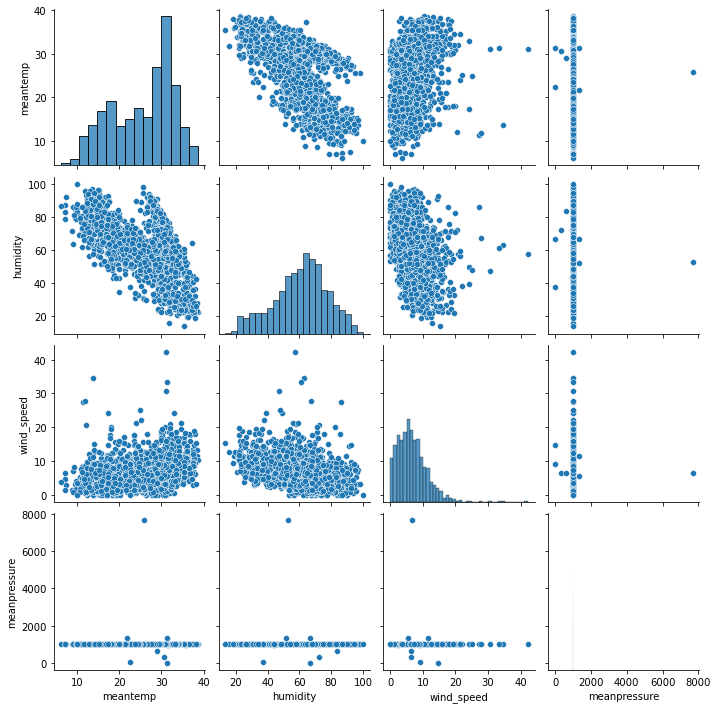

In [7]:
sns.pairplot(df)

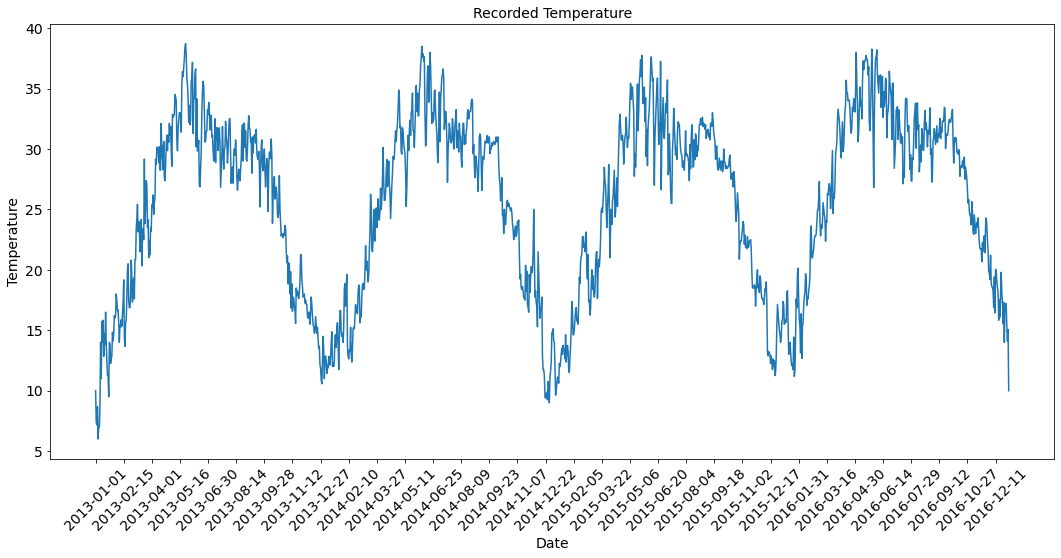

In [8]:
plt.figure(figsize=(18,8))
plt.plot(df.date,df['meantemp'])
plt.xlabel("Date",fontsize=14)
plt.ylabel("Temperature",fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature",fontsize=14)
plt.show()

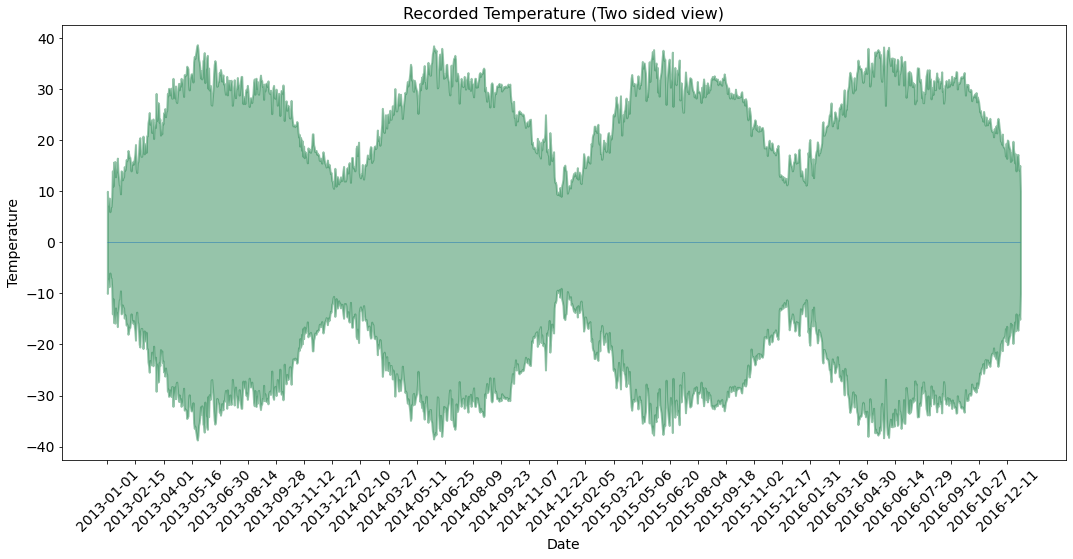

In [9]:
plt.figure(figsize=(18, 8))
plt.fill_between(df.date, y1=df['meantemp'], y2=-df['meantemp'], alpha=0.5, linewidth=2, color='seagreen')
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Two sided view)", fontsize=16)
plt.show()

Temperature Years on Record:  2013 2014 2015 2016


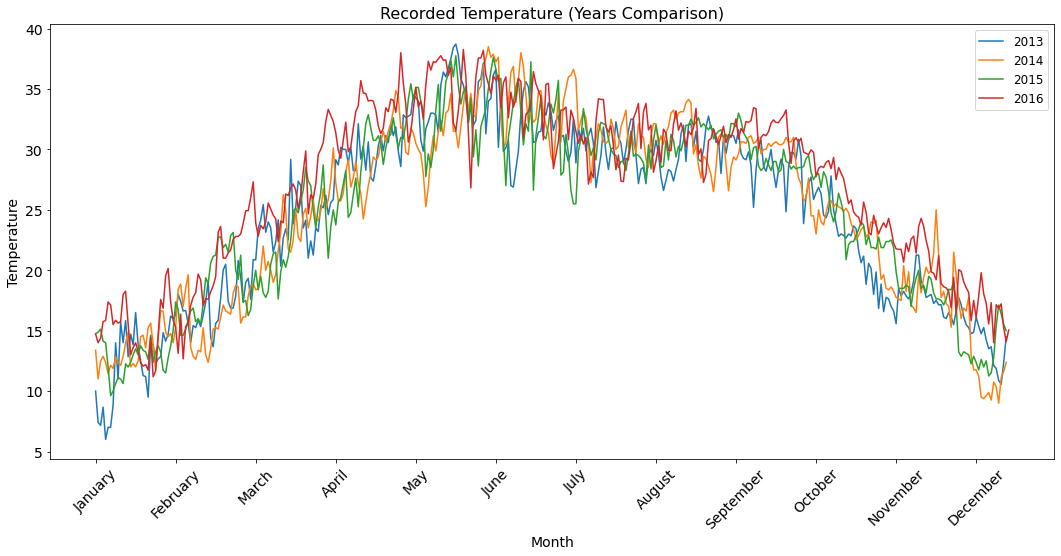

In [10]:
plt.figure(figsize=(18, 8))
dates = pd.to_datetime(df.date.iloc[:-1])
print("Temperature Years on Record: ", *dates.dt.year.unique())
for i in dates.dt.year.unique():
    plt.plot(df['meantemp'].iloc[:-1][dates.dt.year==i].values, label=i)
    
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 365, 32), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Recorded Temperature (Years Comparison)", fontsize=16)
plt.legend(fontsize=12)
plt.show()

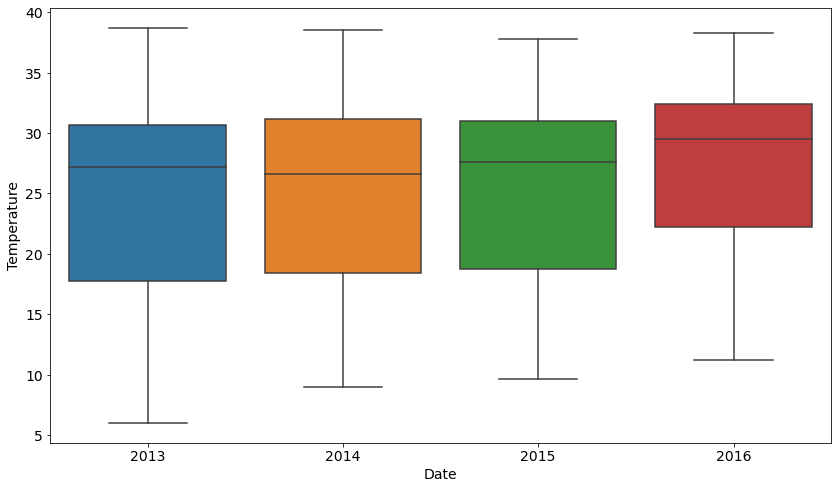

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.year.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

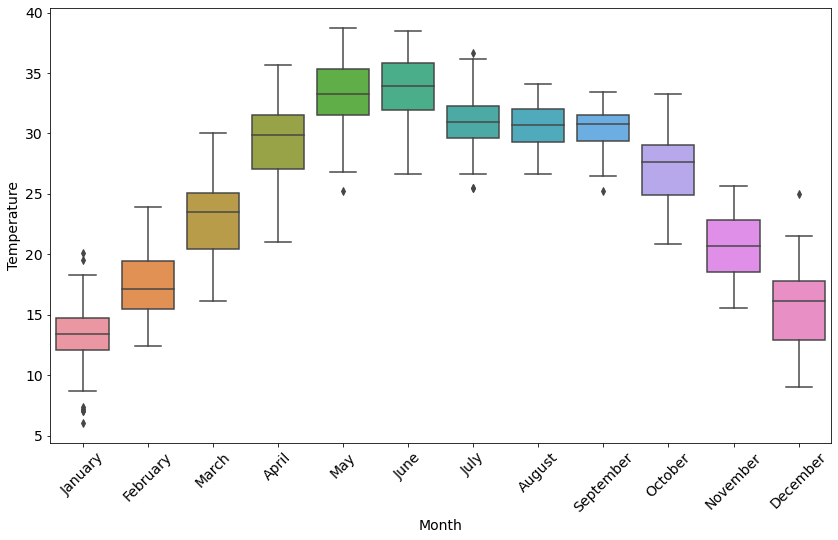

In [12]:
plt.figure(figsize=(14, 8))
sns.boxplot(x=dates.dt.month.iloc[:-1], y='meantemp', data=df.iloc[:-1])
plt.xlabel("Month", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, 12), labels=dates.dt.month_name().unique(), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

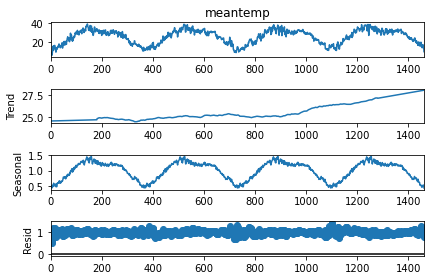

In [13]:


from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition 
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
decomp_mul.plot()
plt.show()

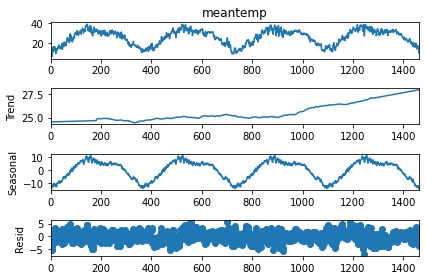

In [14]:
decomp_add = seasonal_decompose(df['meantemp'], model='additive', extrapolate_trend='freq', period=365)
decomp_add.plot()
plt.show()

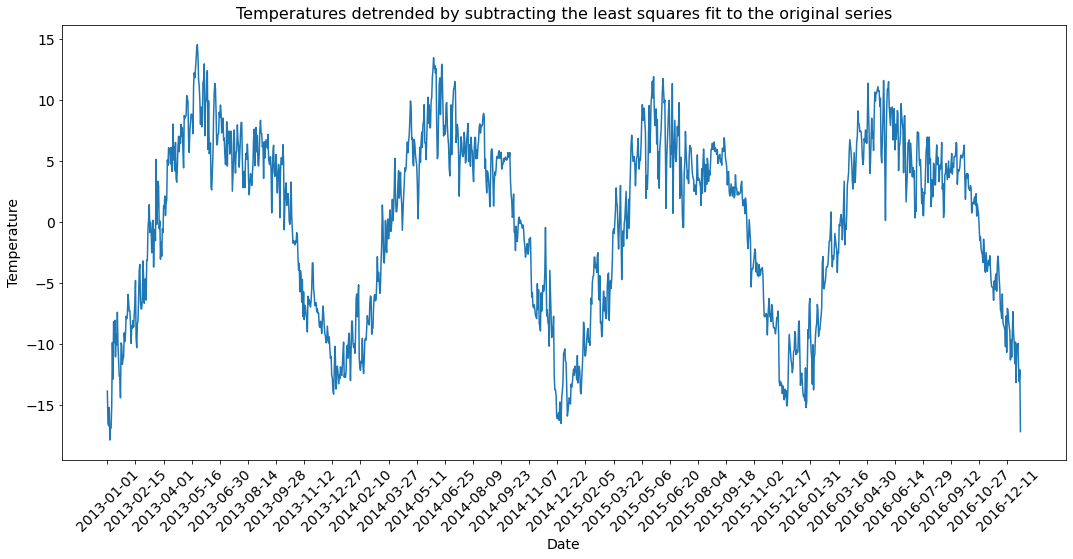

In [15]:
from scipy import signal

plt.figure(figsize=(18, 8))
detrended = signal.detrend(df['meantemp'].values)
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the least squares fit to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

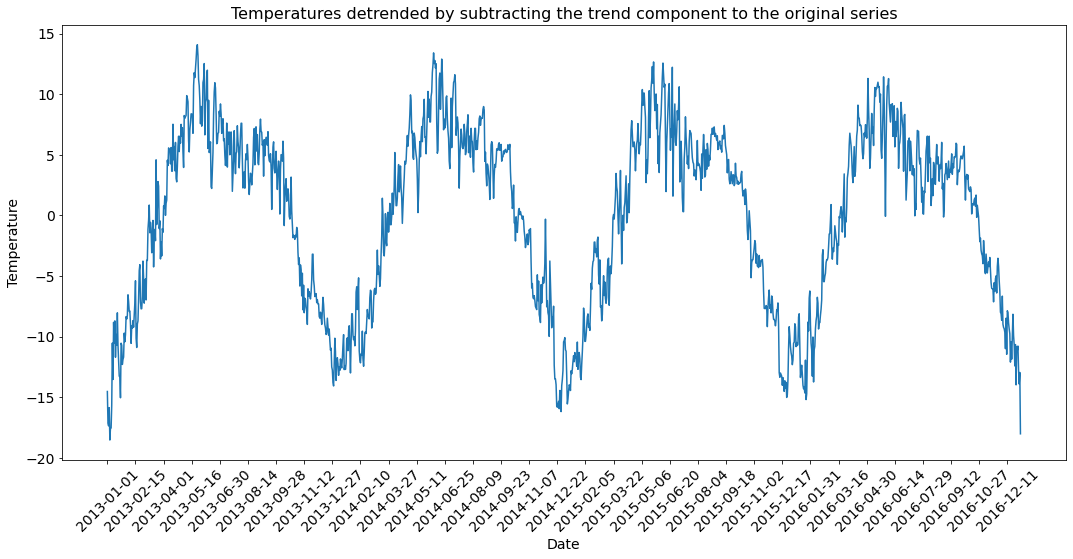

In [16]:
plt.figure(figsize=(18, 8))
decomp_mul = seasonal_decompose(df['meantemp'], model='multiplicative', extrapolate_trend='freq', period=365)
detrended = df['meantemp'].values - decomp_mul.trend
plt.plot(df.date, detrended)
plt.title('Temperatures detrended by subtracting the trend component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

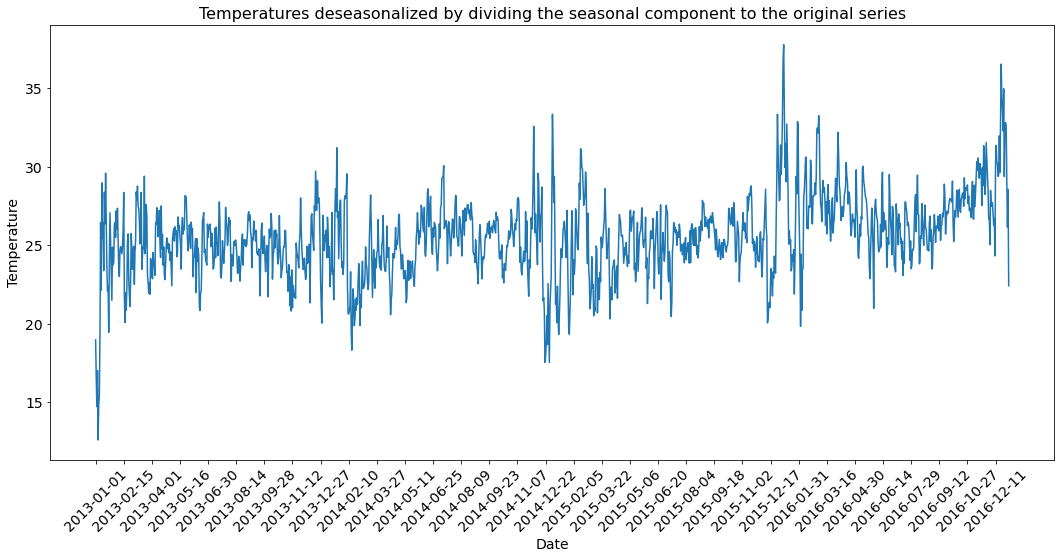

In [17]:
plt.figure(figsize=(18, 8))
deseasonalized = df['meantemp'].values / decomp_mul.seasonal
plt.plot(df.date, deseasonalized)
plt.title('Temperatures deseasonalized by dividing the seasonal component to the original series', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

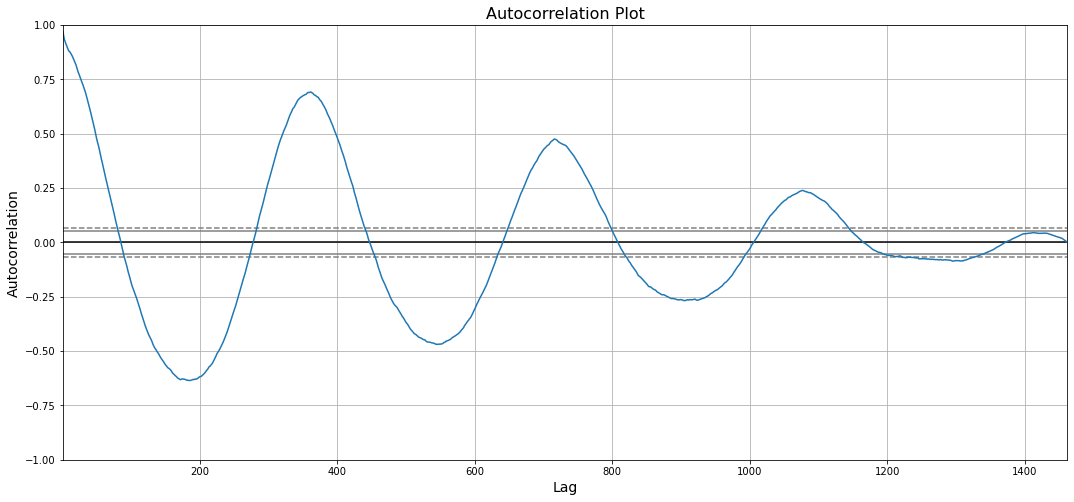

In [18]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(df['meantemp'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

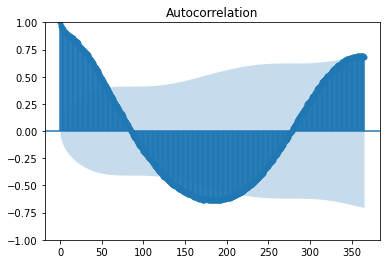

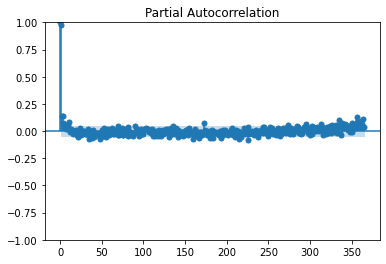

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['meantemp'], lags=365)
plt.show()
plot_pacf(df['meantemp'], lags=365)
plt.show()

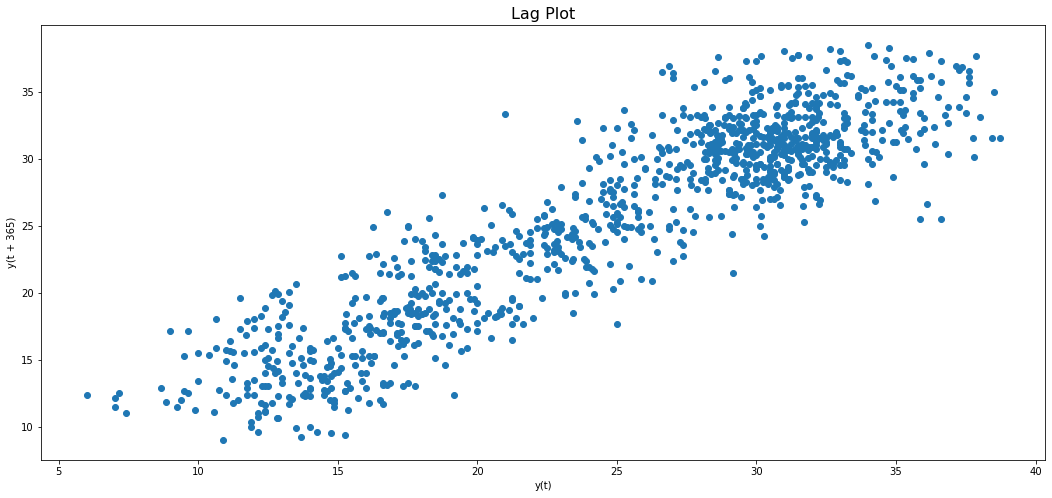

In [20]:
from pandas.plotting import lag_plot

plt.figure(figsize=(18, 8))
lag_plot(df['meantemp'], lag=365)
plt.title('Lag Plot', fontsize=16)
plt.show()

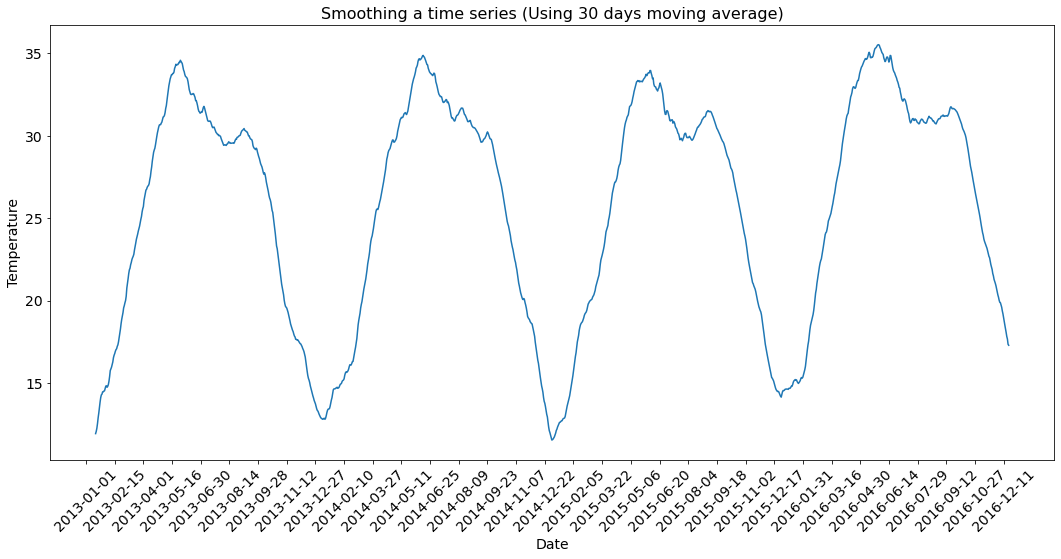

In [21]:
plt.figure(figsize=(18, 8))
df_ma = df['meantemp'].rolling(30, center=True, closed='both').mean()
plt.plot(df.date, df_ma)
plt.title('Smoothing a time series (Using 30 days moving average)', fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)
plt.xticks(np.arange(0, len(df.date)+1, 45), rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

 # 3D plots in Matplotlib

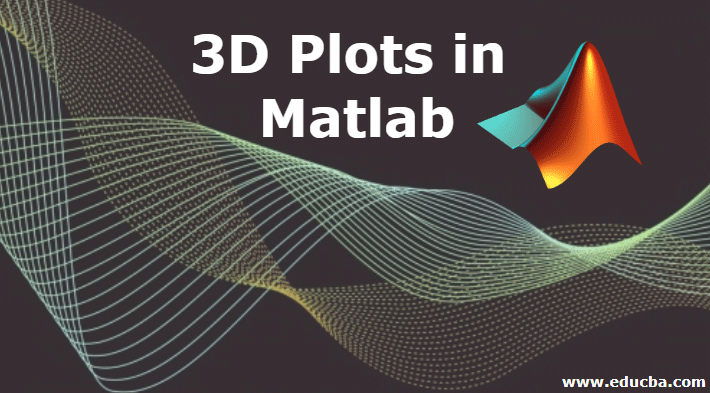

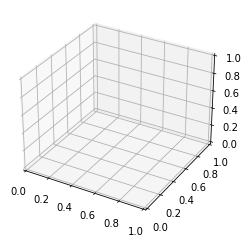

In [22]:
fig = plt.figure()
ax= plt.axes(projection='3d')

In [23]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

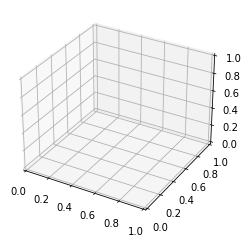

In [24]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')


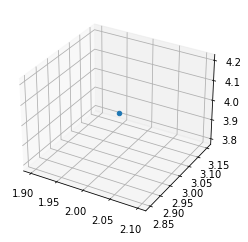

In [25]:
fig = plt.figure(figsize=(4,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(2,3,4) # plot the point (2,3,4) on the figure

plt.show()

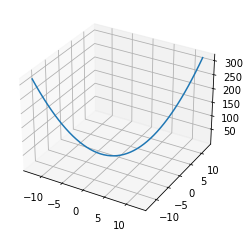

In [26]:
import numpy as np

x = np.linspace(-4*np.pi,4*np.pi,50)

y = np.linspace(-4*np.pi,4*np.pi,50)

z = x**2 + y**2

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z)

plt.show()


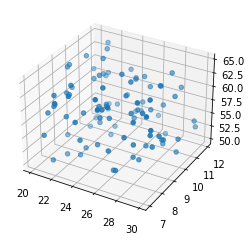

In [27]:
np.random.seed(42)

xs = np.random.random(100)*10+20

ys = np.random.random(100)*5+7

zs = np.random.random(100)*15+50

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs,ys,zs)

plt.show()

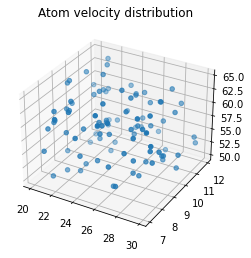

In [28]:
ax.set_title("Atom velocity distribution")

fig

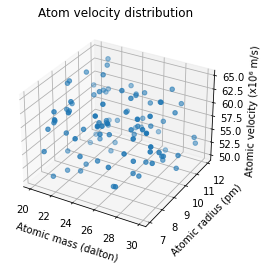

In [29]:
ax.set_xlabel("Atomic mass (dalton)")

ax.set_ylabel("Atomic radius (pm)")

ax.set_zlabel("Atomic velocity (x10⁶ m/s)")

fig

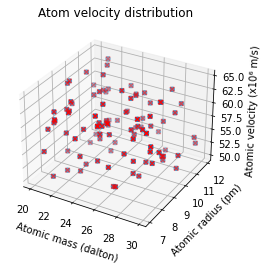

In [30]:
ax.scatter(xs,ys,zs, marker="x", c="red")
fig

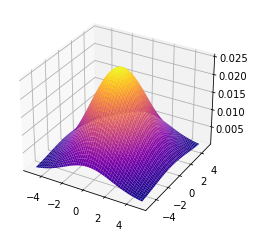

In [31]:
from scipy.stats import multivariate_normal

X = np.linspace(-5,5,50)

Y = np.linspace(-5,5,50)

X, Y = np.meshgrid(X,Y)

X_mean = 0; Y_mean = 0

X_var = 5; Y_var = 8

pos = np.empty(X.shape+(2,))

pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal([X_mean, Y_mean],[[X_var, 0], [0, Y_var]])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

plt.show()

<IPython.core.display.Javascript object>


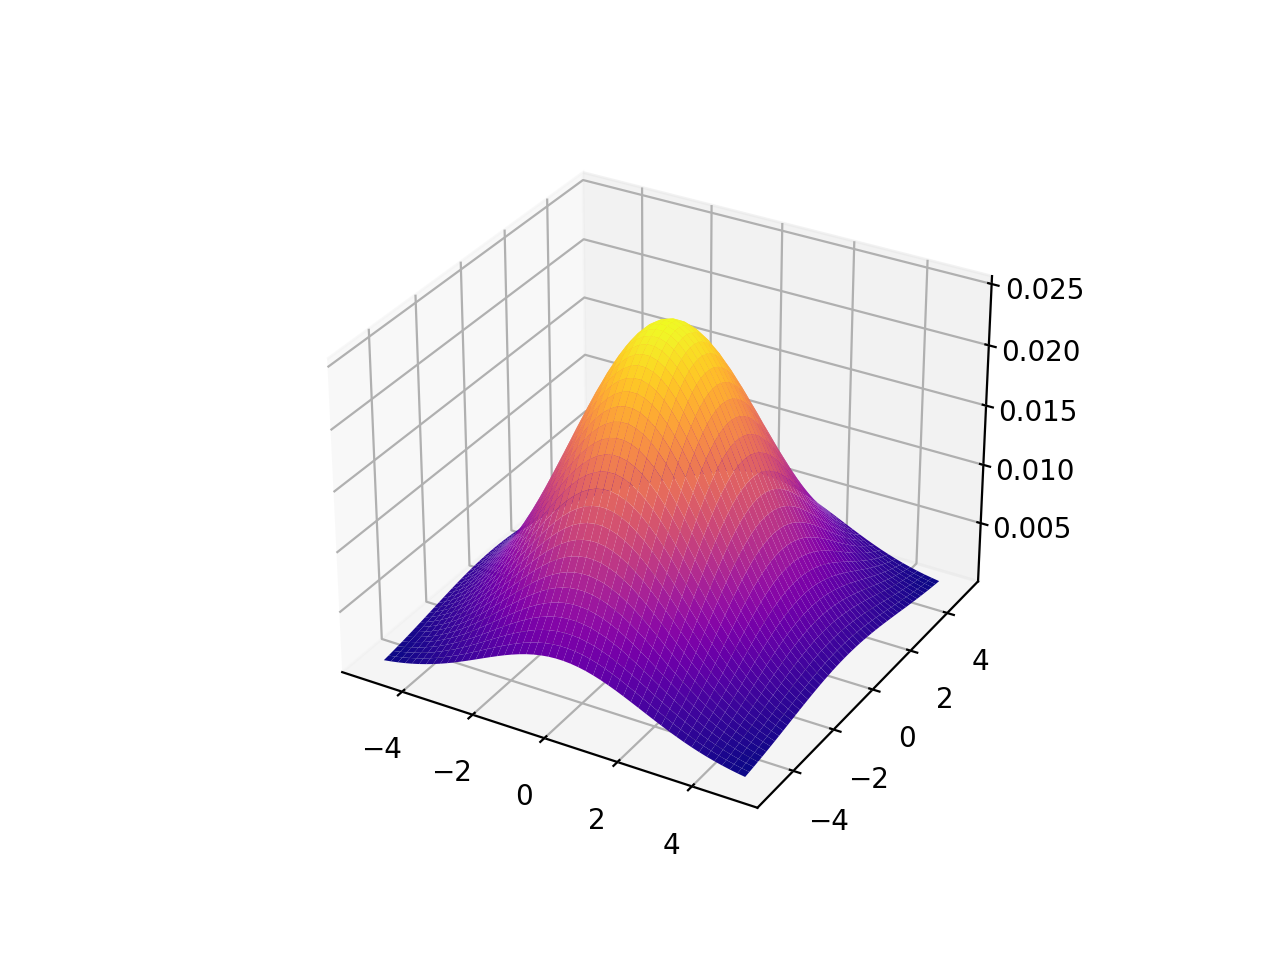

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy.stats import multivariate_normal

X = np.linspace(-5,5,50)

Y = np.linspace(-5,5,50)

X, Y = np.meshgrid(X,Y)

X_mean = 0; Y_mean = 0

X_var = 5; Y_var = 8

pos = np.empty(X.shape+(2,))

pos[:,:,0]=X

pos[:,:,1]=Y

rv = multivariate_normal([X_mean, Y_mean],[[X_var, 0], [0, Y_var]])

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, rv.pdf(pos), cmap="plasma")

plt.show()

In [33]:
xdata = 7 * np.random.random(100)
ydata = np.sin(xdata) + 0.25 * np.random.random(100)
zdata = np.cos(xdata) + 0.25 * np.random.random(100)

<IPython.core.display.Javascript object>


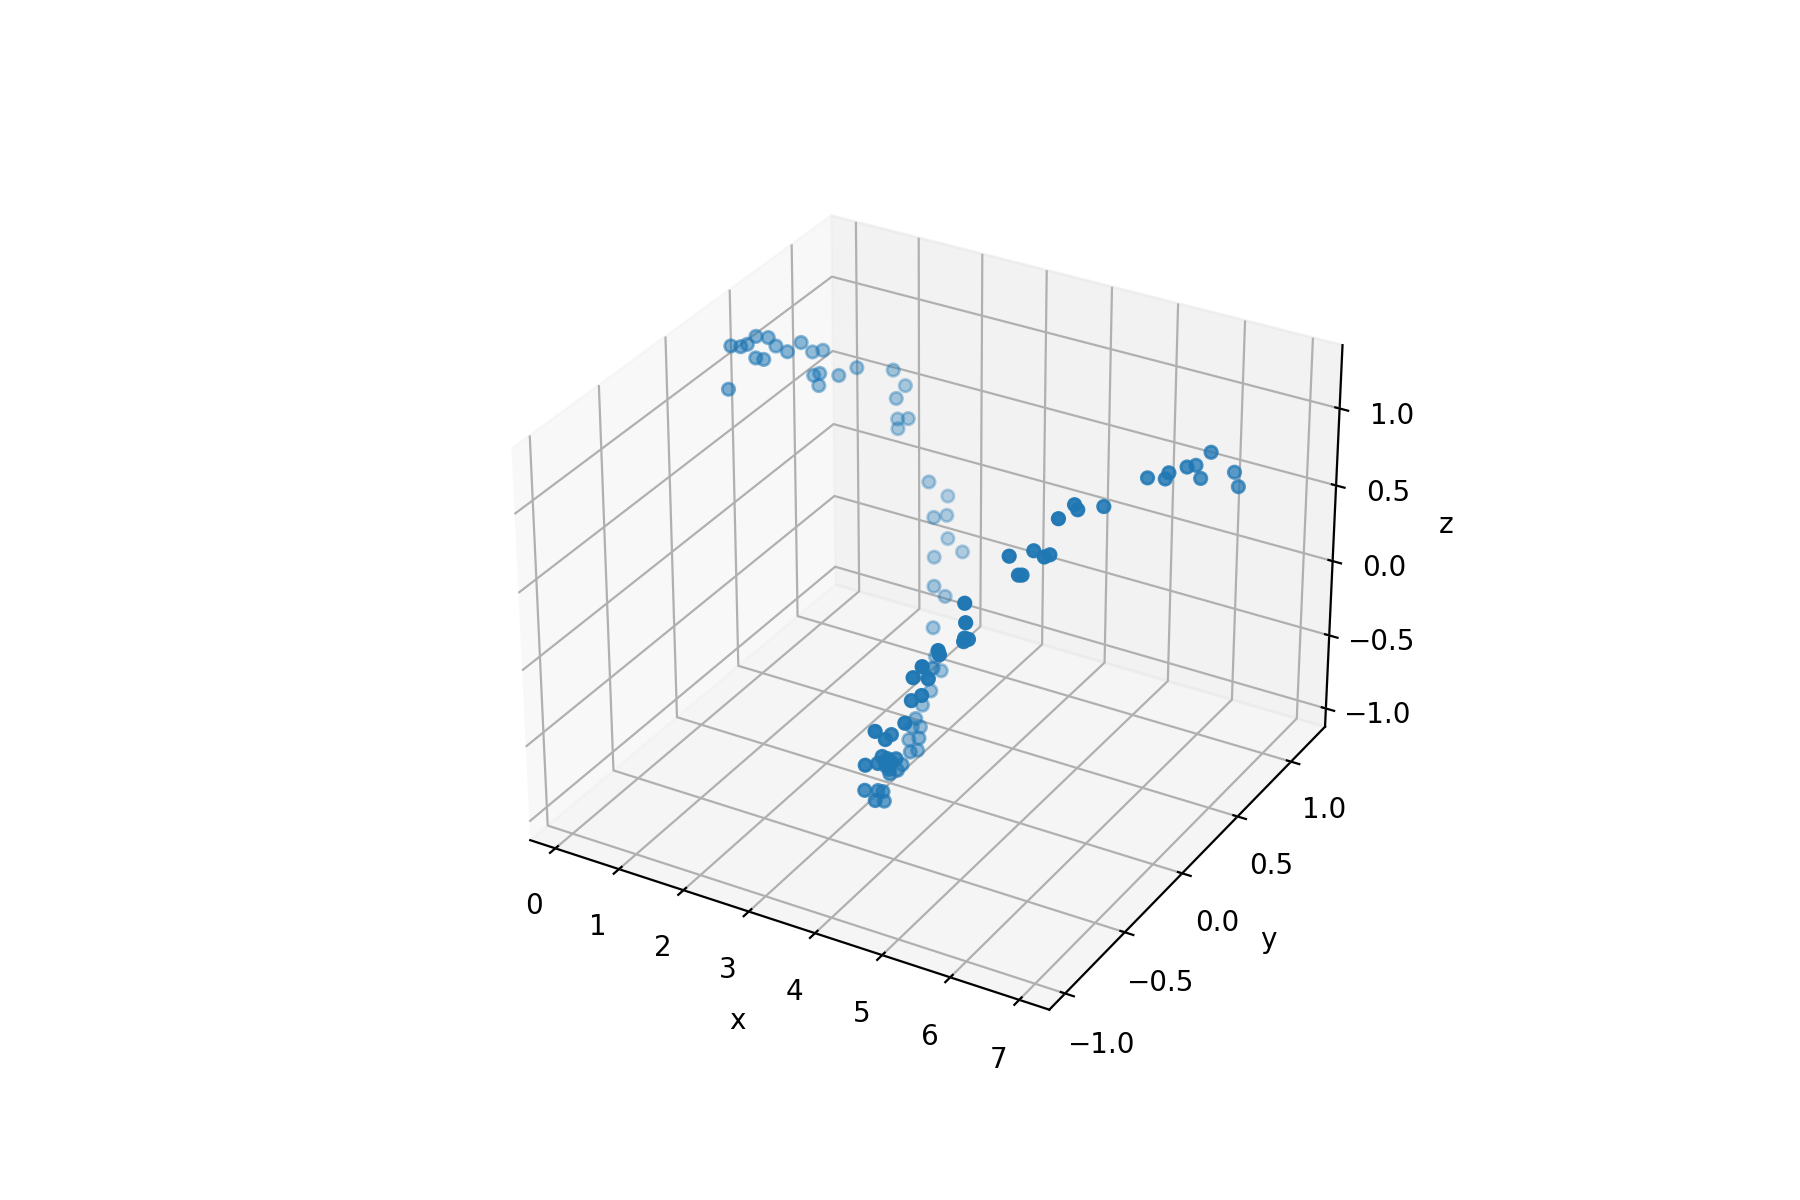

In [34]:
fig = plt.figure(figsize=(9, 6))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(xdata, ydata, zdata)
# Give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Save figure
plt.savefig('3d_scatter.png', dpi = 300);

<IPython.core.display.Javascript object>


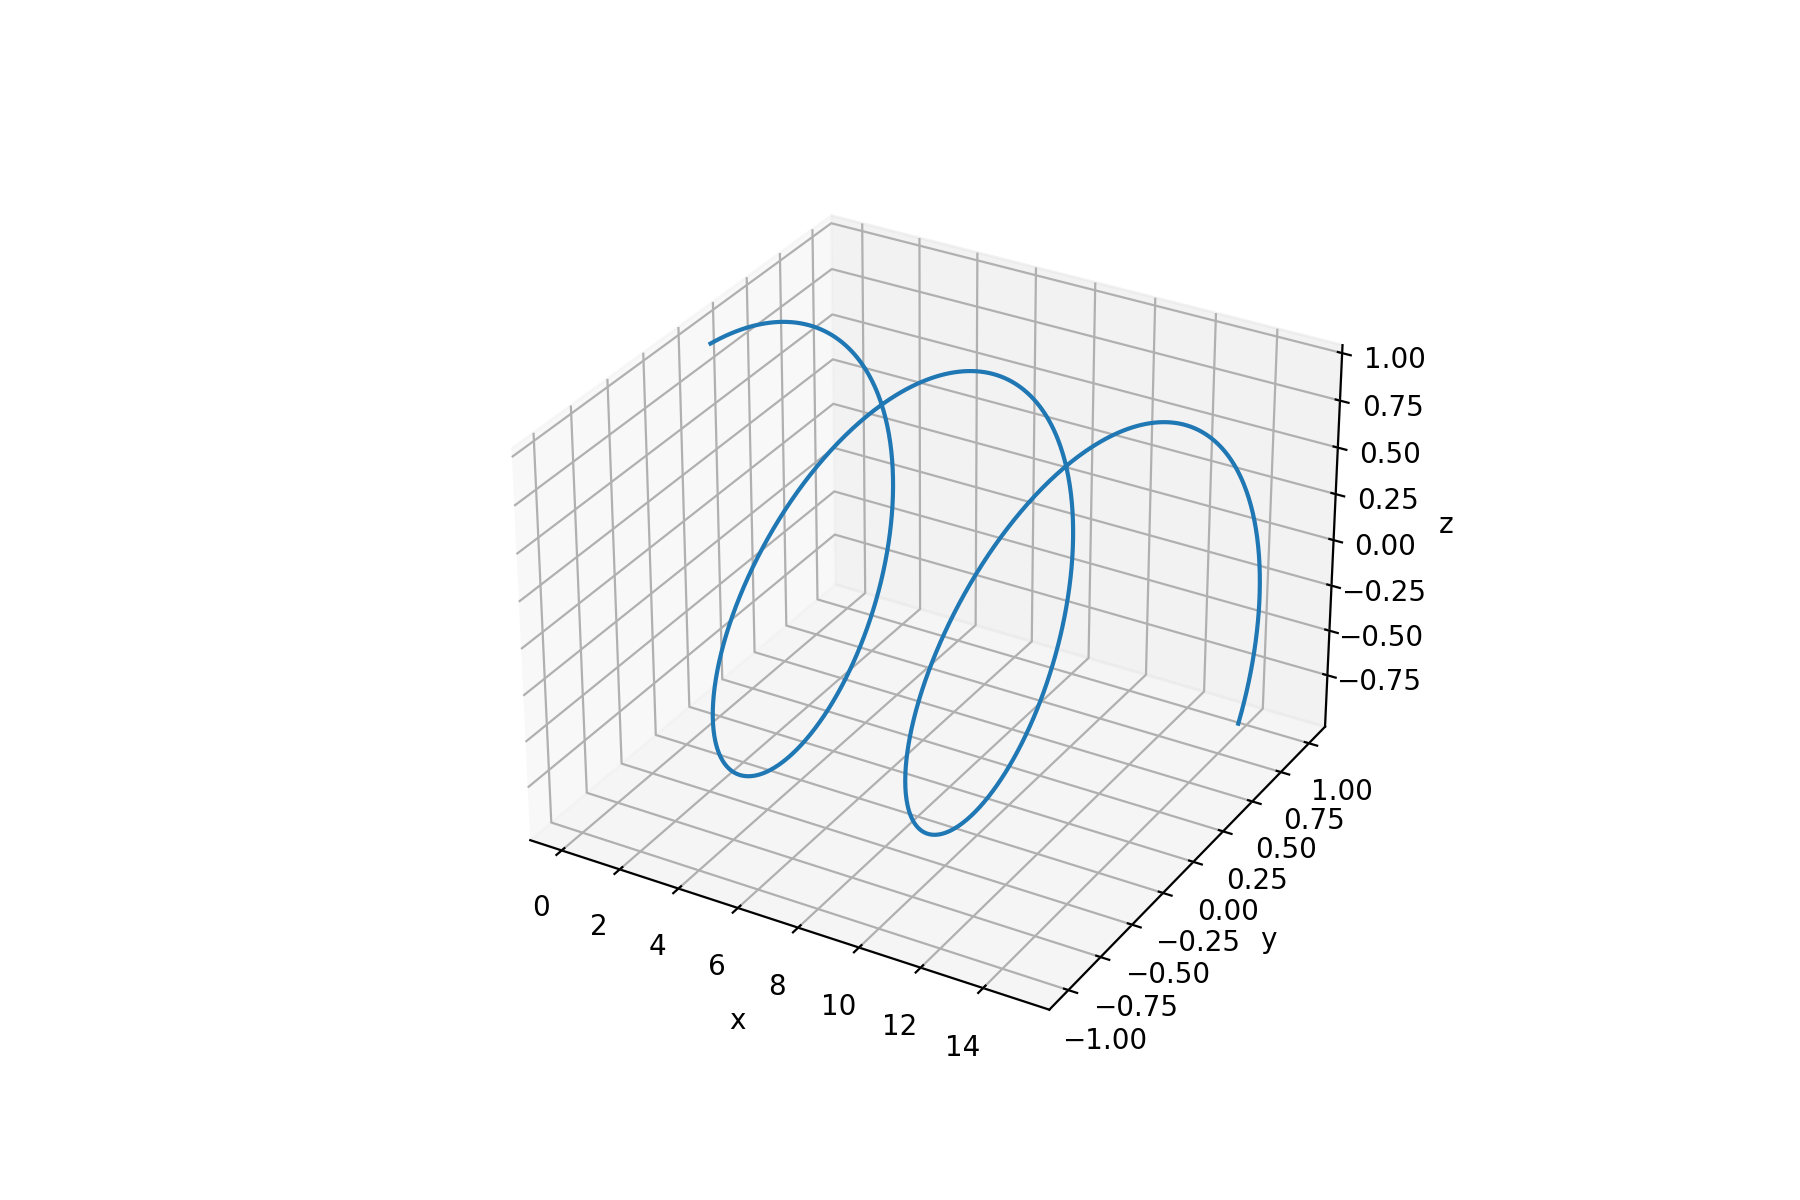

Text(0.5, 0, 'z')

In [35]:
ig = plt.figure(figsize=(9, 6))
#create data for 3d line
xline = np.linspace(0, 15, 1000)
yline = np.sin(xline)
zline = np.cos(xline)
#3d container
ax = plt.axes(projection = '3d')
#3d scatter plot
ax.plot3D(xline, yline, zline)
#give labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<IPython.core.display.Javascript object>


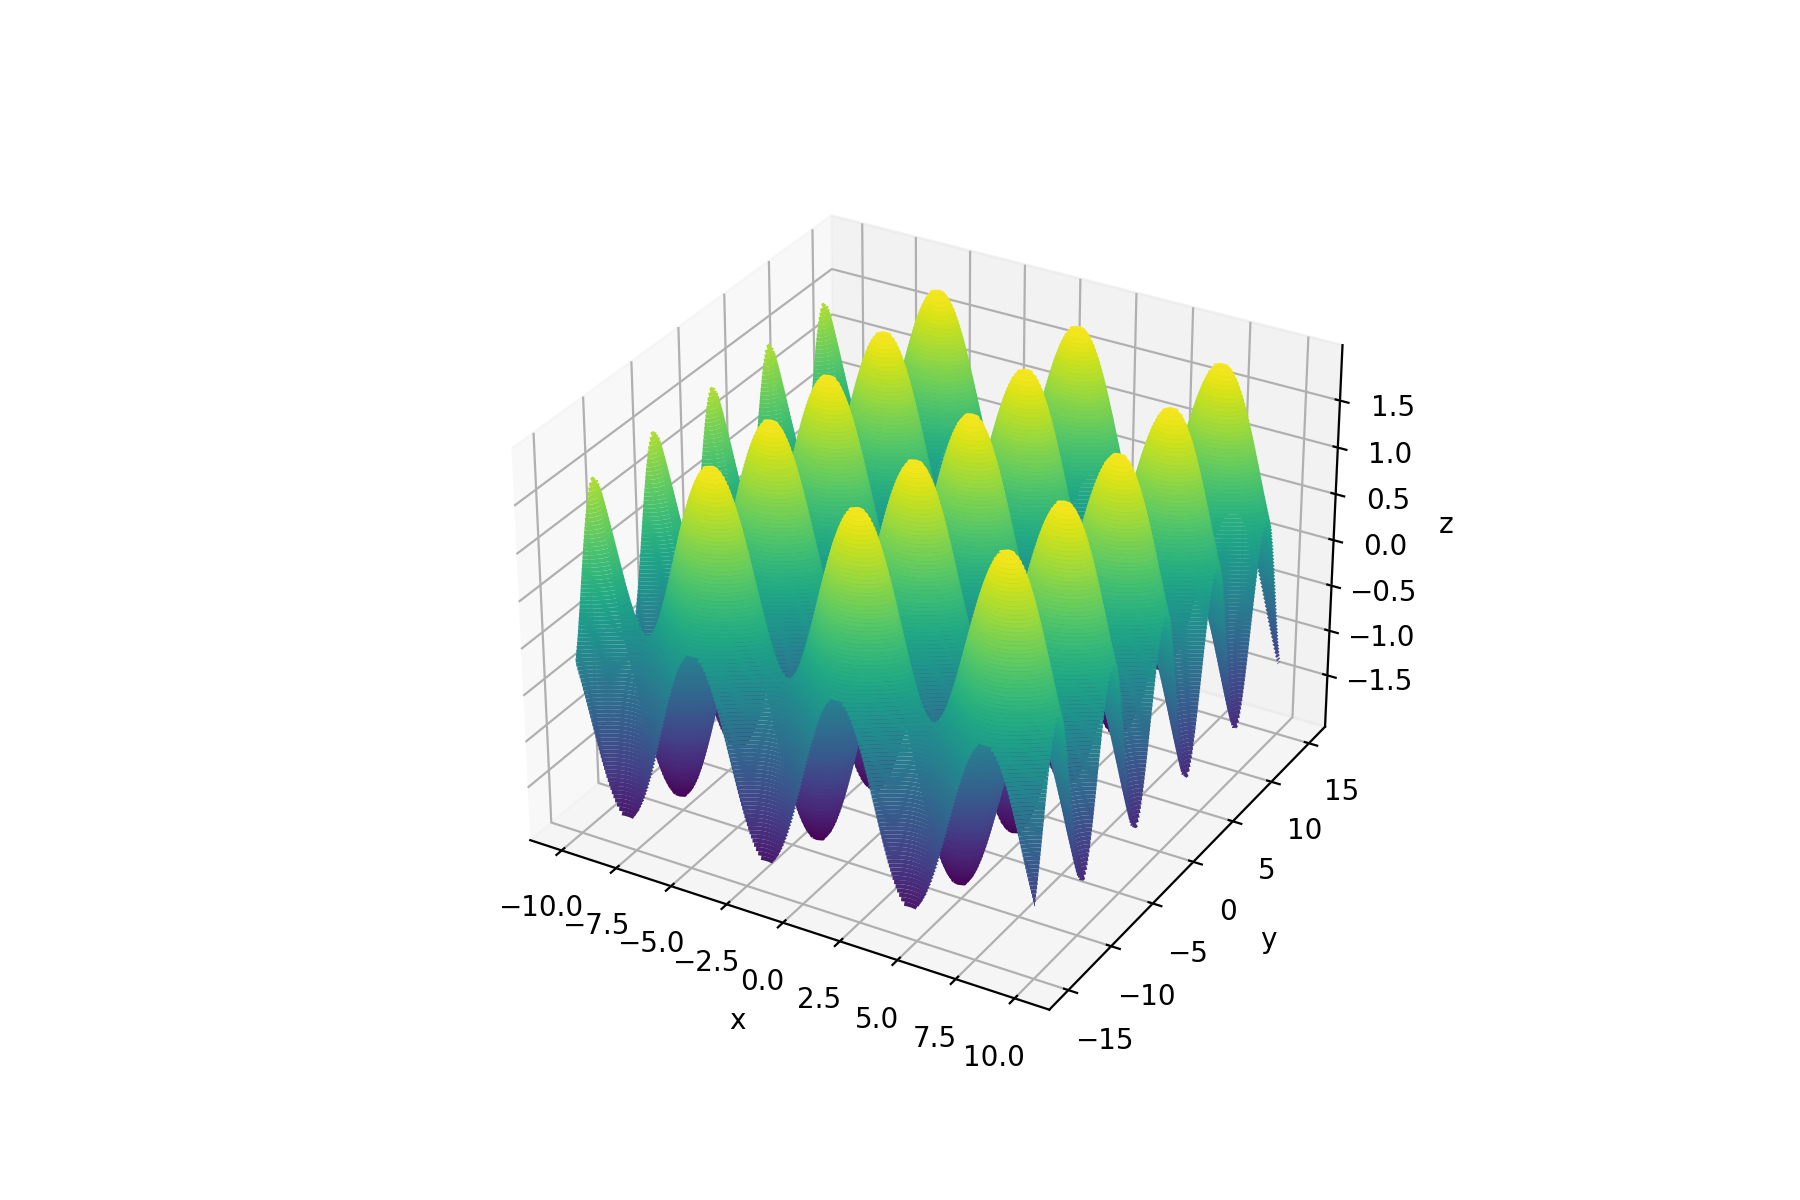

In [36]:
# create data points
x = np.linspace(-10, 10, 100)
y = np.linspace(-15, 15, 100)
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.contour3D(X, Y, Z, 100, cmap = 'viridis')
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# save figure
plt.savefig('3d_contour.png', dpi = 300)

<IPython.core.display.Javascript object>


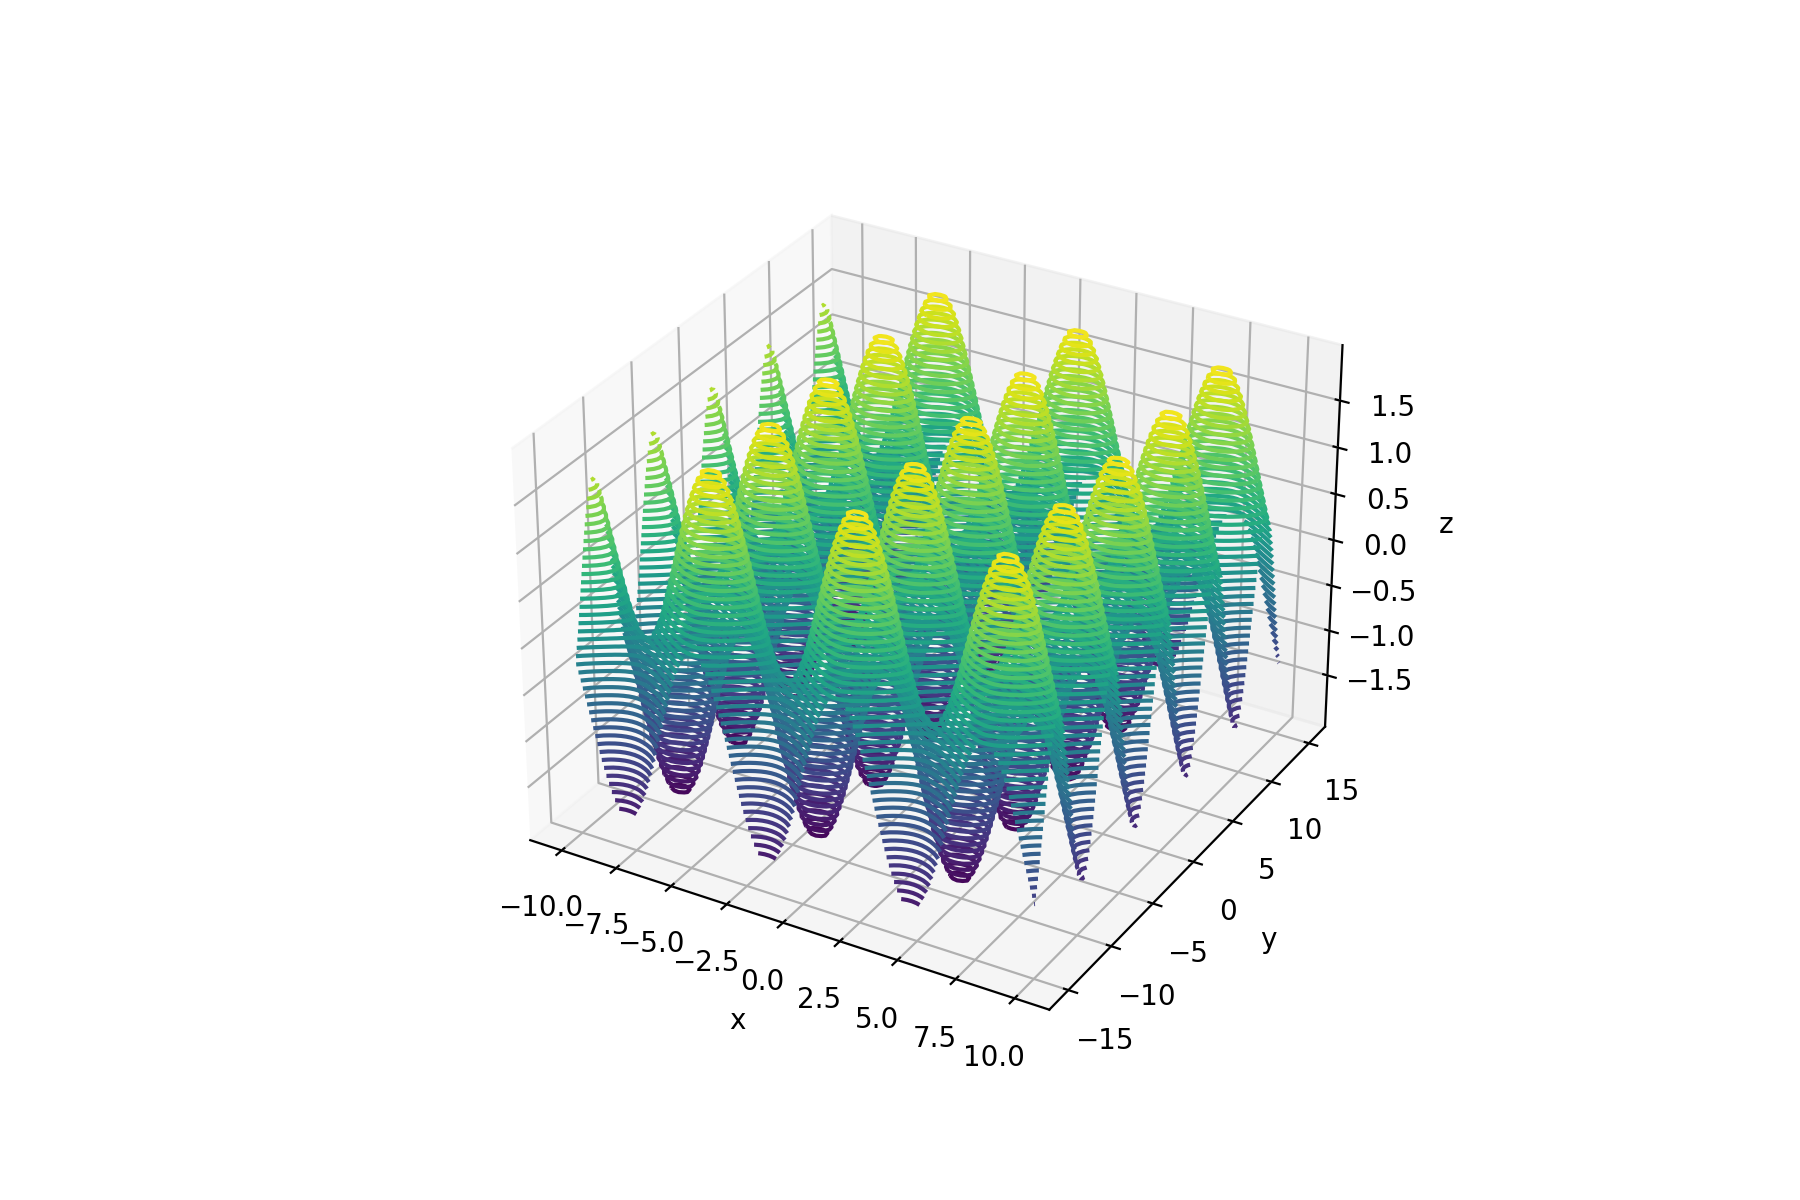

In [37]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-15, 15, 100)
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.contour3D(X, Y, Z, 50, cmap = 'viridis')
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# save figure
plt.savefig('3d_contour.png', dpi = 300)

<IPython.core.display.Javascript object>


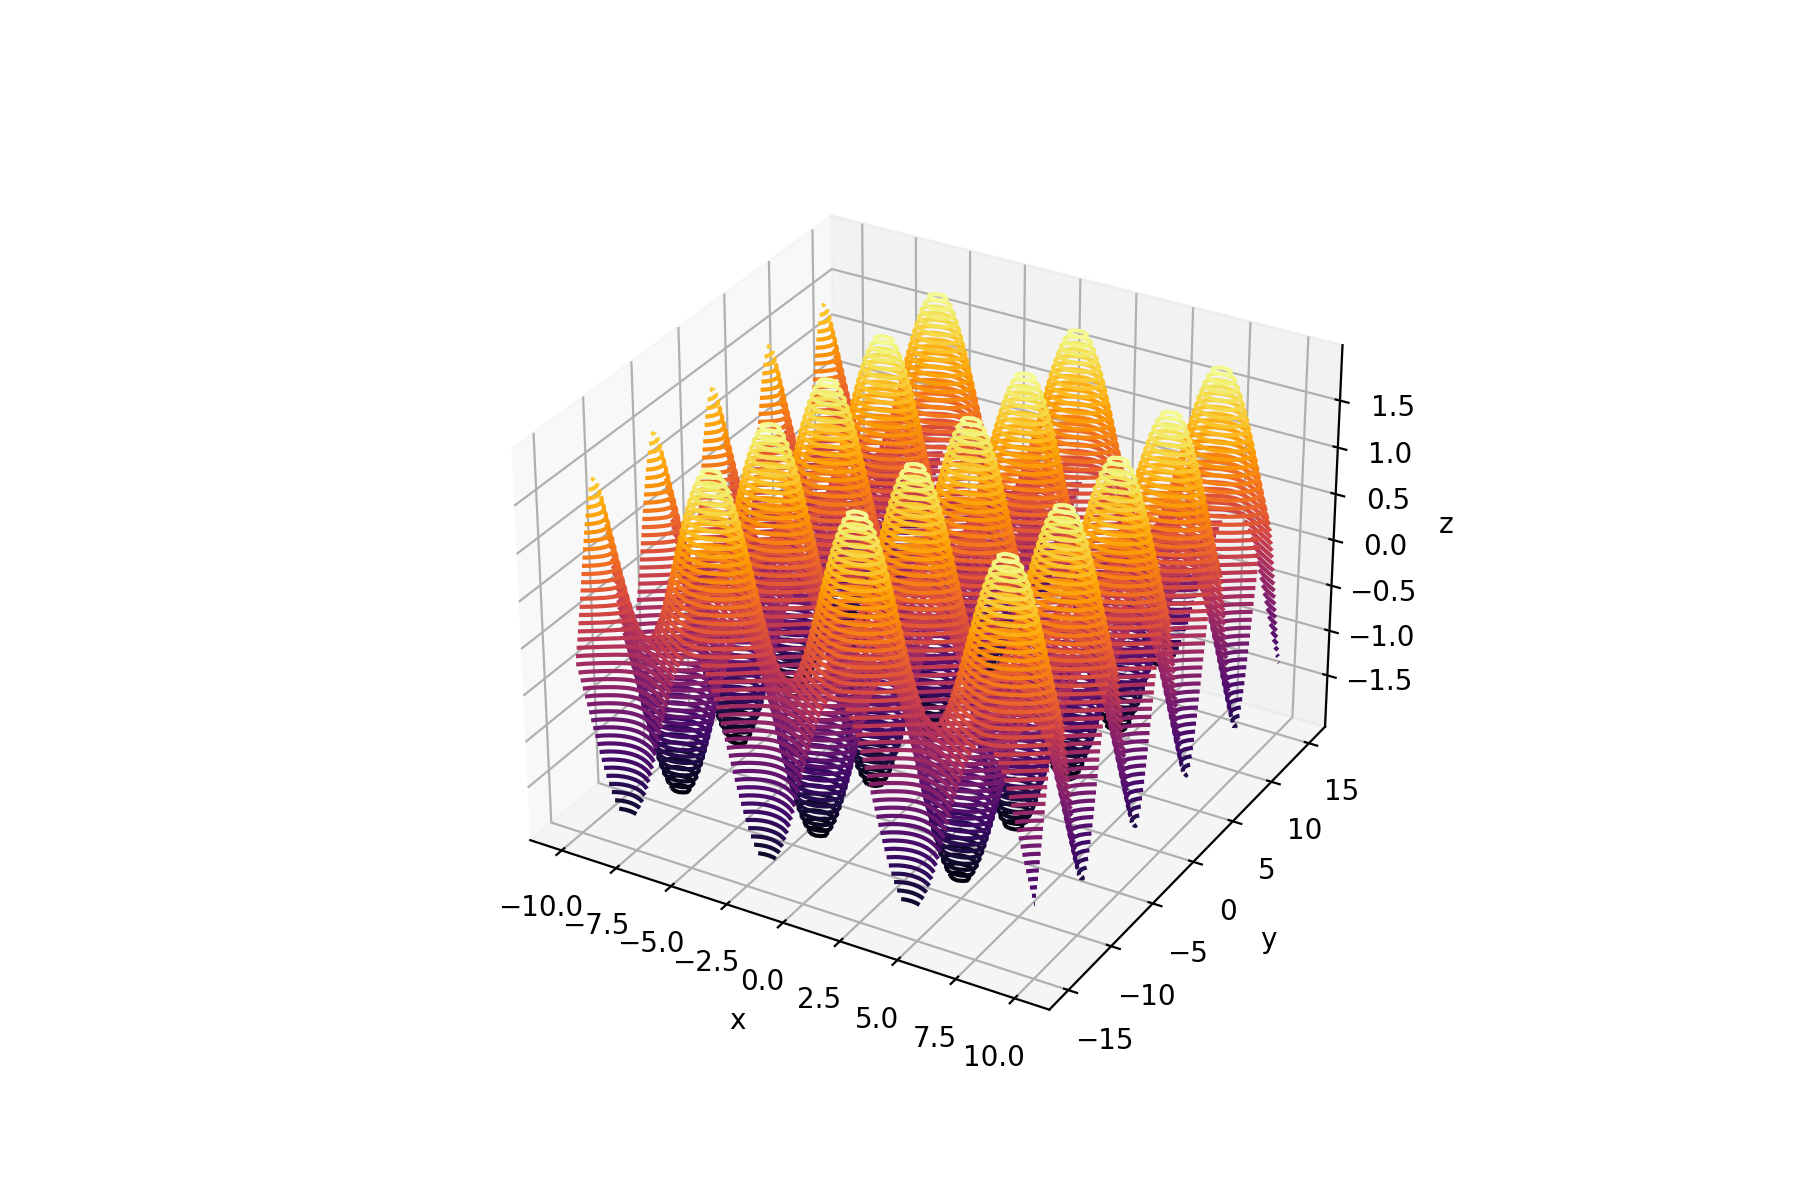

In [38]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-15, 15, 100)
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.contour3D(X, Y, Z, 50, cmap = 'inferno')
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# save figure
plt.savefig('3d_contour.png', dpi = 300)

<IPython.core.display.Javascript object>


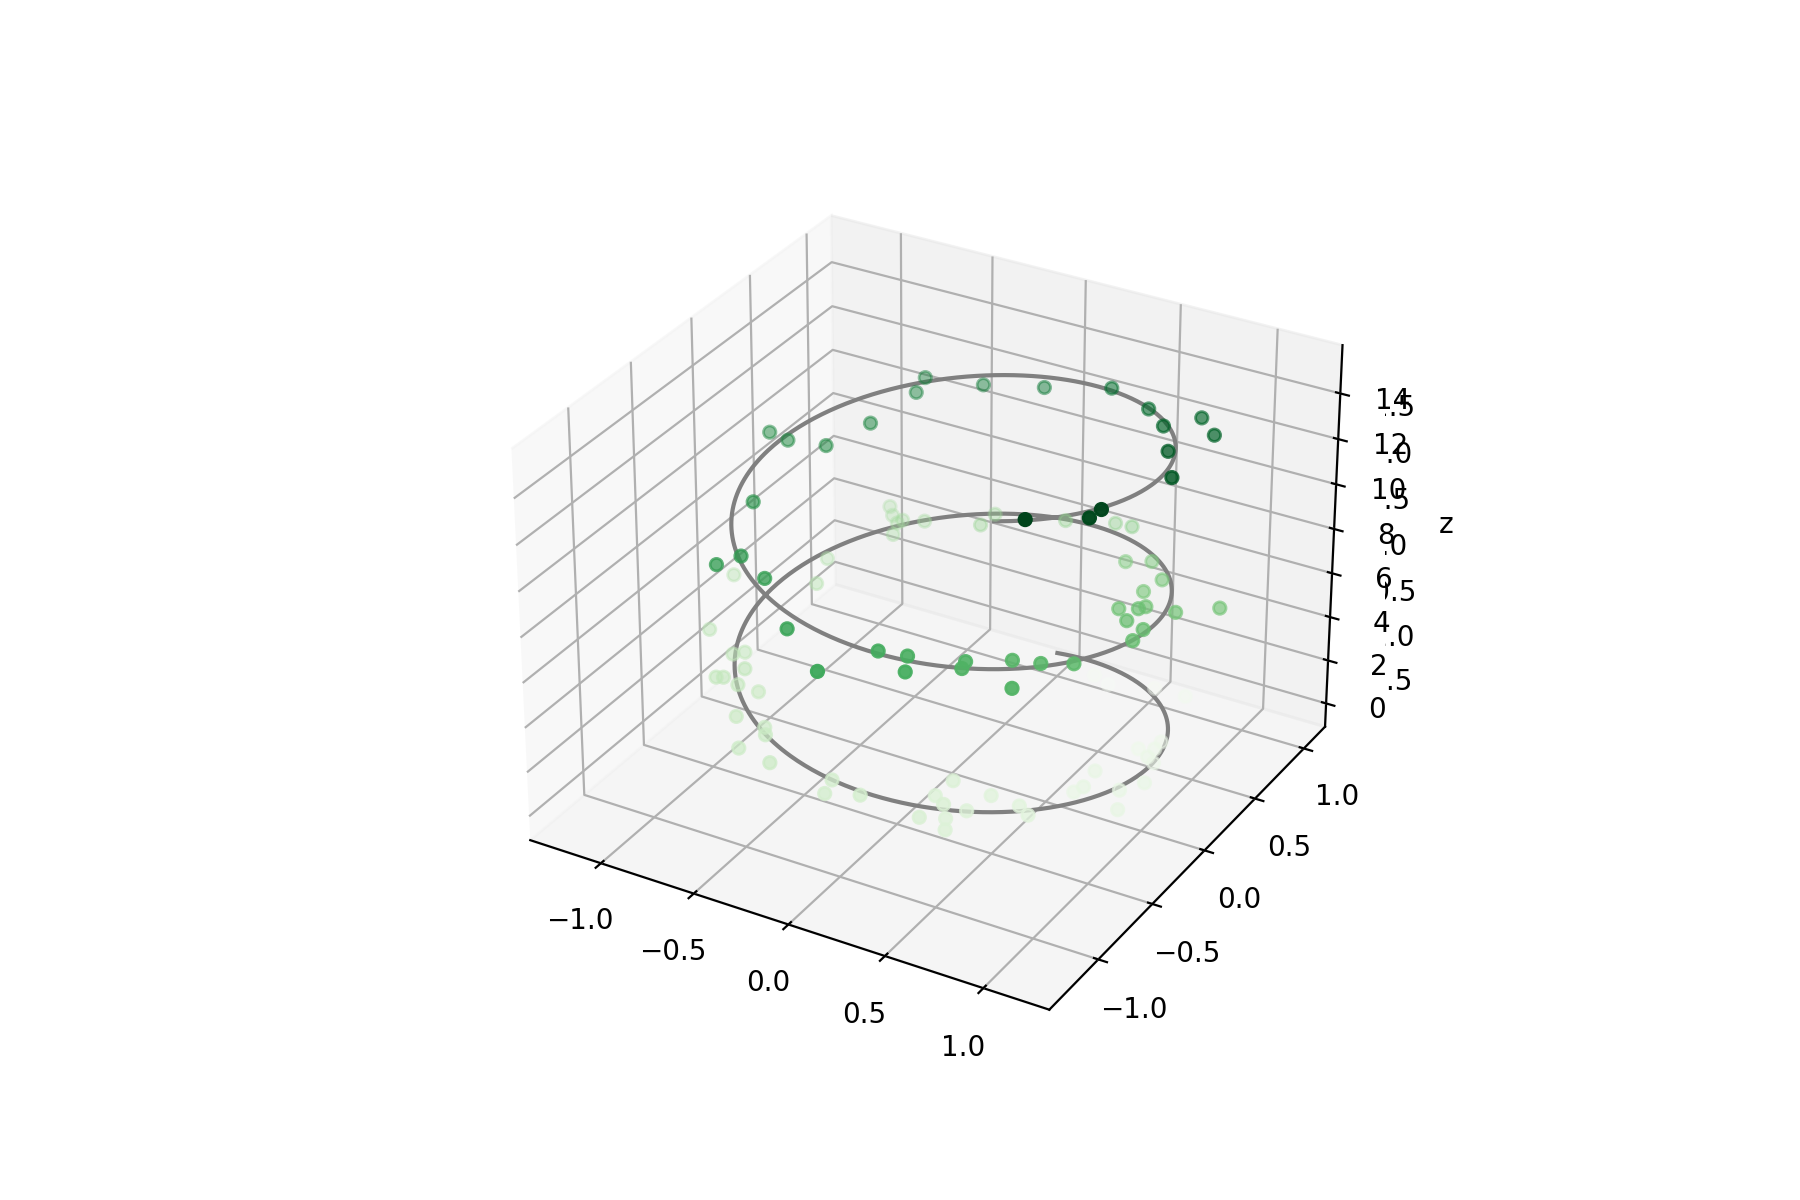

In [39]:
# create data points
x = np.linspace(-10, 10, 100)
y = np.linspace(-15, 15, 100)
# create grid
X, Y = np.meshgrid(x, y)
Z = np.sin(X) + np.cos(Y)
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_wireframe(X, Y, Z, 2, color = 'black', alpha = .2)
# set labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# save figure
plt.savefig('3d_wireframe.png', dpi = 300)

In [40]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [41]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

<IPython.core.display.Javascript object>


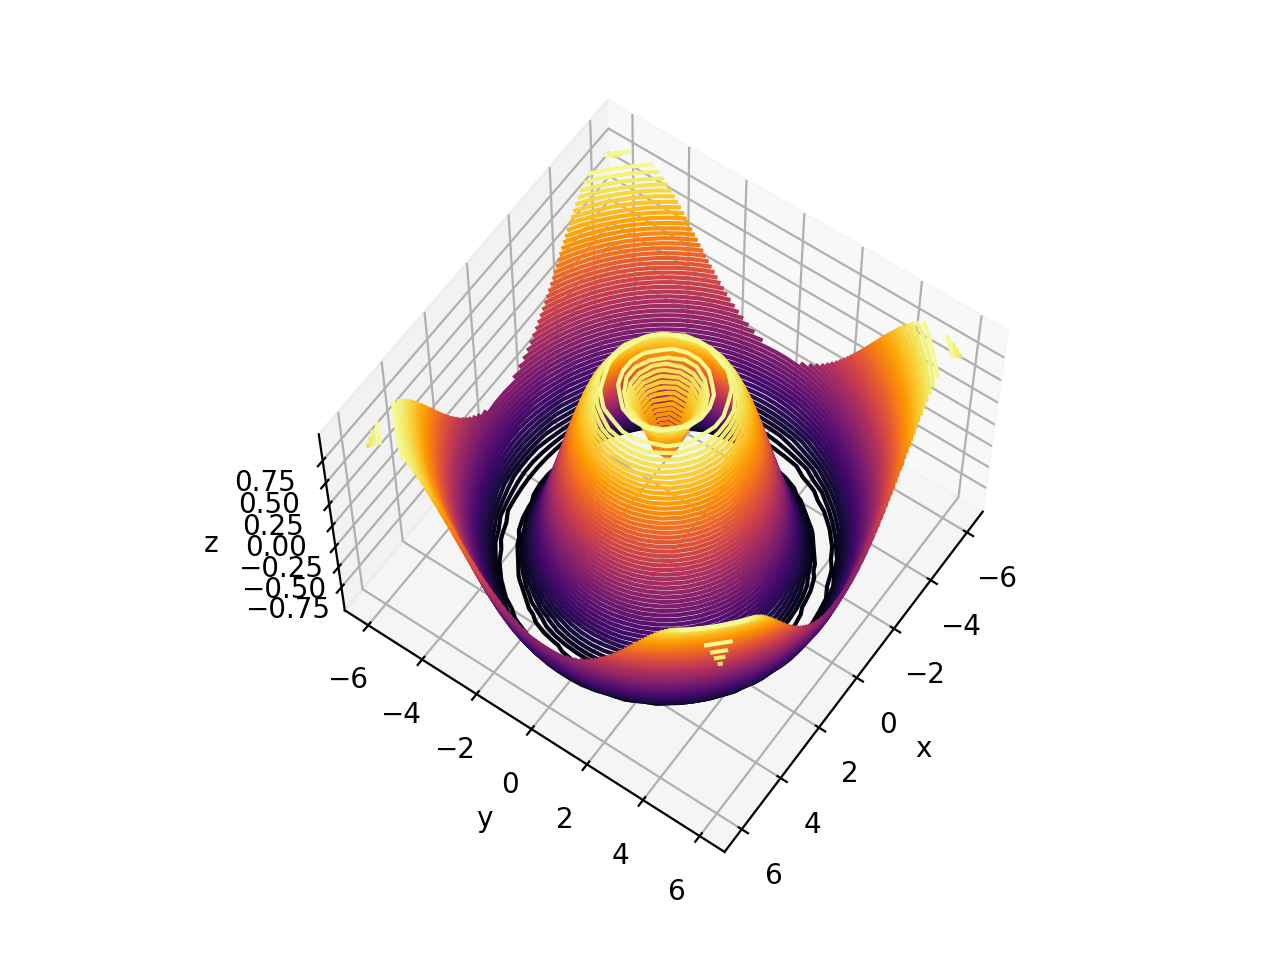

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

<IPython.core.display.Javascript object>


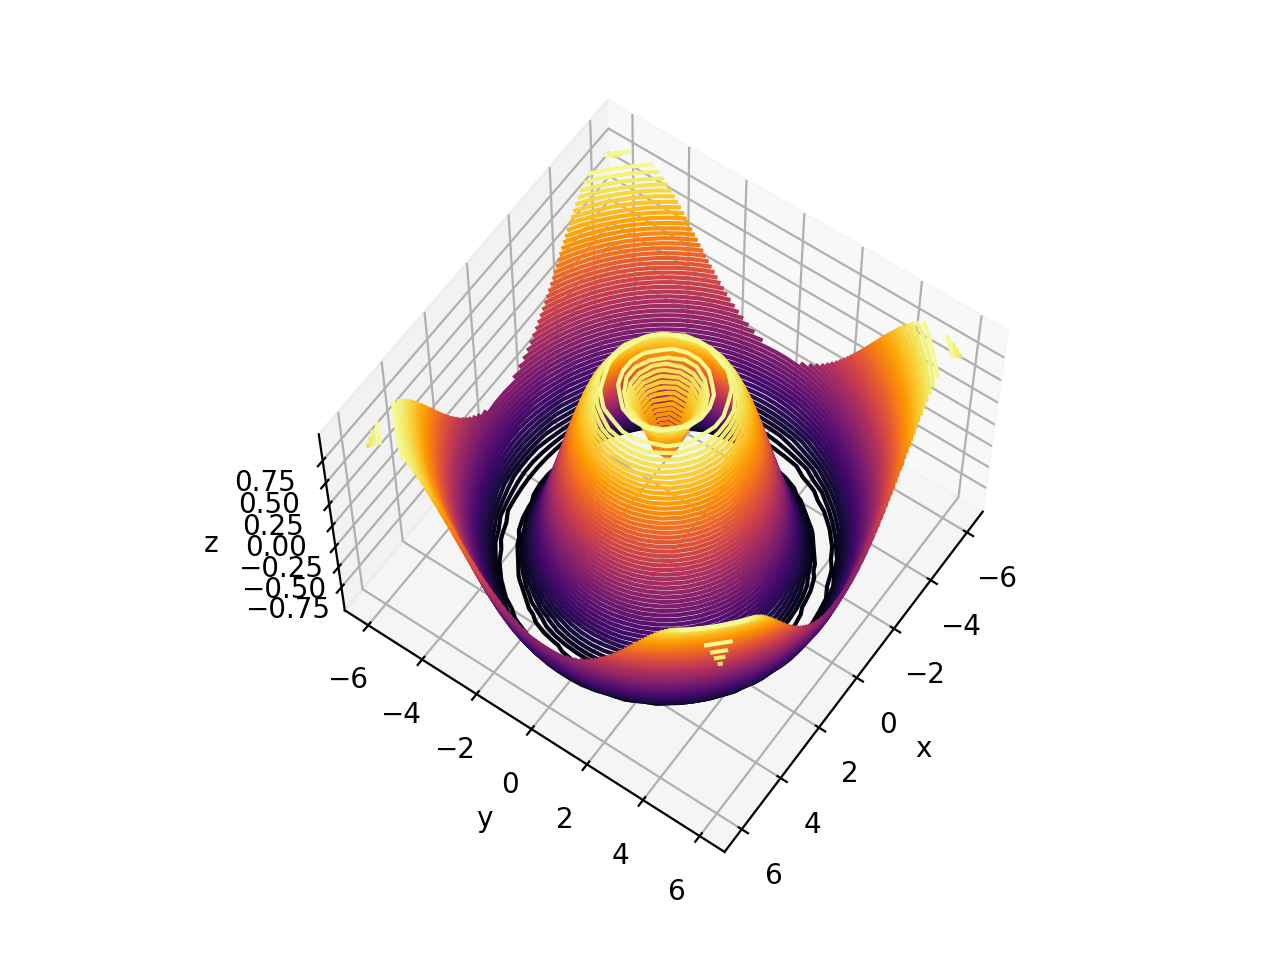

In [43]:
ax.view_init(60, 35)
fig


<IPython.core.display.Javascript object>


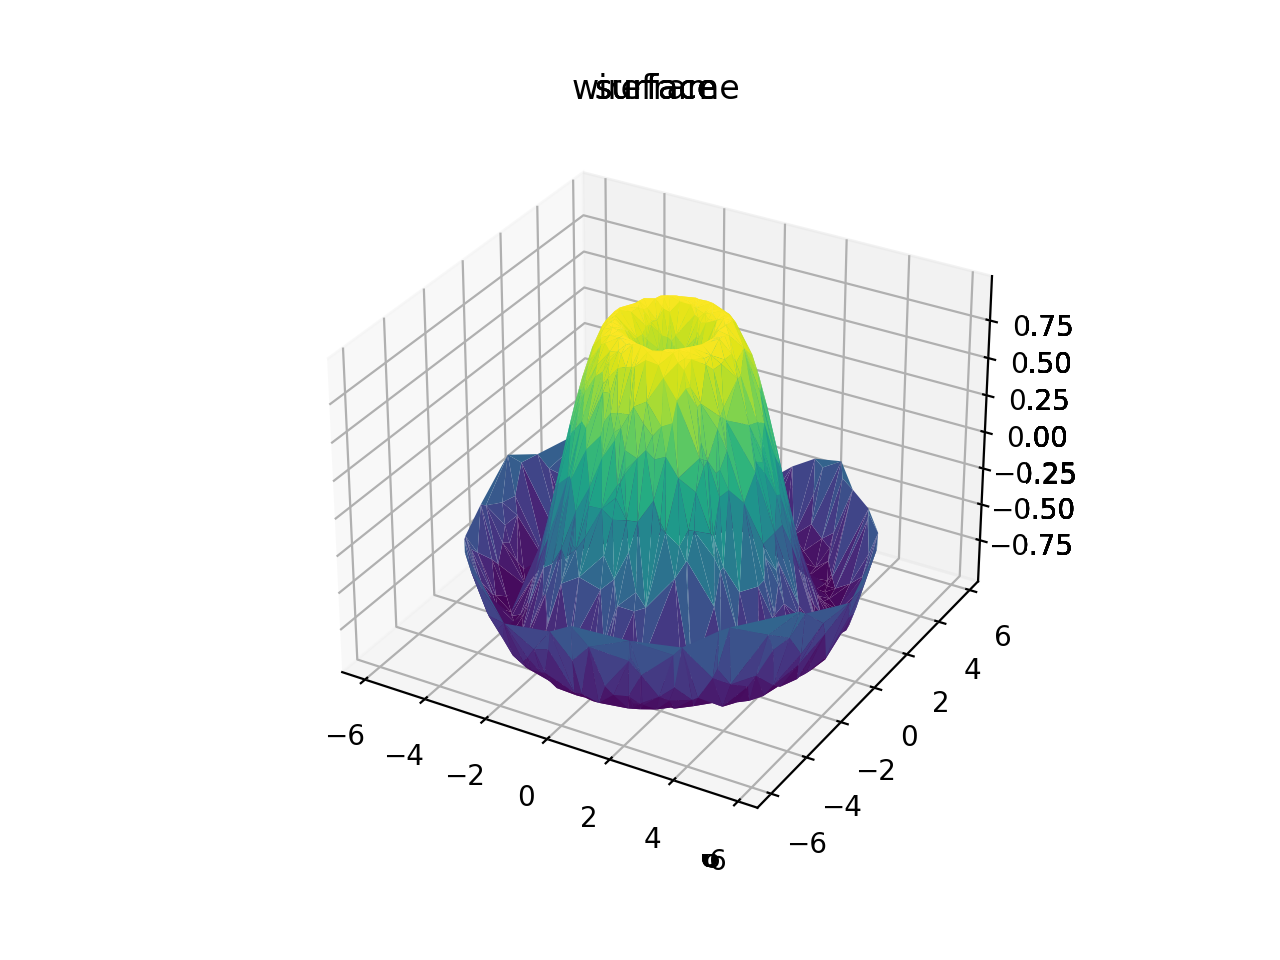

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');